### Background

This project is a combination exploratory data anlaysis and regression modeling. The analysis is conducted on the Ames housing [dataset](https://www.kaggle.com/competitions/stat101ahouseprice/overview) which was used in a prior Kaggle competition.<br>

The analysis can be broken down into three distinct parts:
* Exploratory data analysis
* Pre-model data preparation
* Modeling<br>

The goal of the project was to employ different machine learning techniques to predict the value of the SalePrice variable in the dataset. The metric used to evaluate the different model approaches was the Root-Mean-Squared-Error (RMSE).

The data comprised of 79 explanatory variables describing various aspects of residential homes in Ames, Iowa.

Being able to predict home prices can be of interest to real estate agents, potential homeowners,
insurance companies, and property value assesors.

By analyzing the different features we can uncover which are the most important in determining the sales price of a home. Providing specific information to real estate agents, potential homeowners, insurance companies, and property value assesors will enable them to be more effective in achieving their desired outcome.




#### Loading libraries for EDA


In [1]:
# Load libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

plt.style.use('bmh')



#### Loading and Exploring Data



##### Data size and structure

The train and test datasets consists of object, integer and float variables. The index column was not read-in leaving 80 variables in the train and 79 variables in the test data. The target variable SalePrice was not included in the test dataset.

In [2]:
# Load Train set
df_train = pd.read_csv("Data/train.csv",index_col= "Id")
print(df_train.shape)

# Load Test set
df_test = pd.read_csv("Data/test.csv",index_col= "Id")
df_test.shape

(1460, 80)


(1459, 79)

In [3]:
# Checking if column headings are the same in both data set
dif_1 = [x for x in df_train.columns if x not in df_test.columns]
print(dif_1)

dif_2 = [x for x in df_test.columns if x not in df_train.columns]
dif_2

['SalePrice']


[]

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Descriptive Statistics of Columns

The variables in the train dataset were analyzed to get summary statistics for the continous variables and frequency
for the categorical variables.

In [5]:
#descriptive statistics summary
v_features =df_train.columns
for i, cn in enumerate(df_train[v_features]):
    print(i,cn)
    print(df_train[cn].describe())
    print("-"*40)

0 MSSubClass
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
----------------------------------------
1 MSZoning
count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
----------------------------------------
2 LotFrontage
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
----------------------------------------
3 LotArea
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
----------------------------------------
4 Street
count     1460
unique       2
top       Pave
freq      1454
Name: Street

#### Correlation

Analyzed the correlation between continuous variables and SalePrice to determine which variables are highly correlated with the target variable. Performed variable-to-variable correlation to gain insight into which variables are correlated with each other.

In [6]:
# Correlation: features with target variable
corr_features_target = df_train.corr()['SalePrice'].sort_values(ascending=False)
corr_features_target

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<AxesSubplot:>

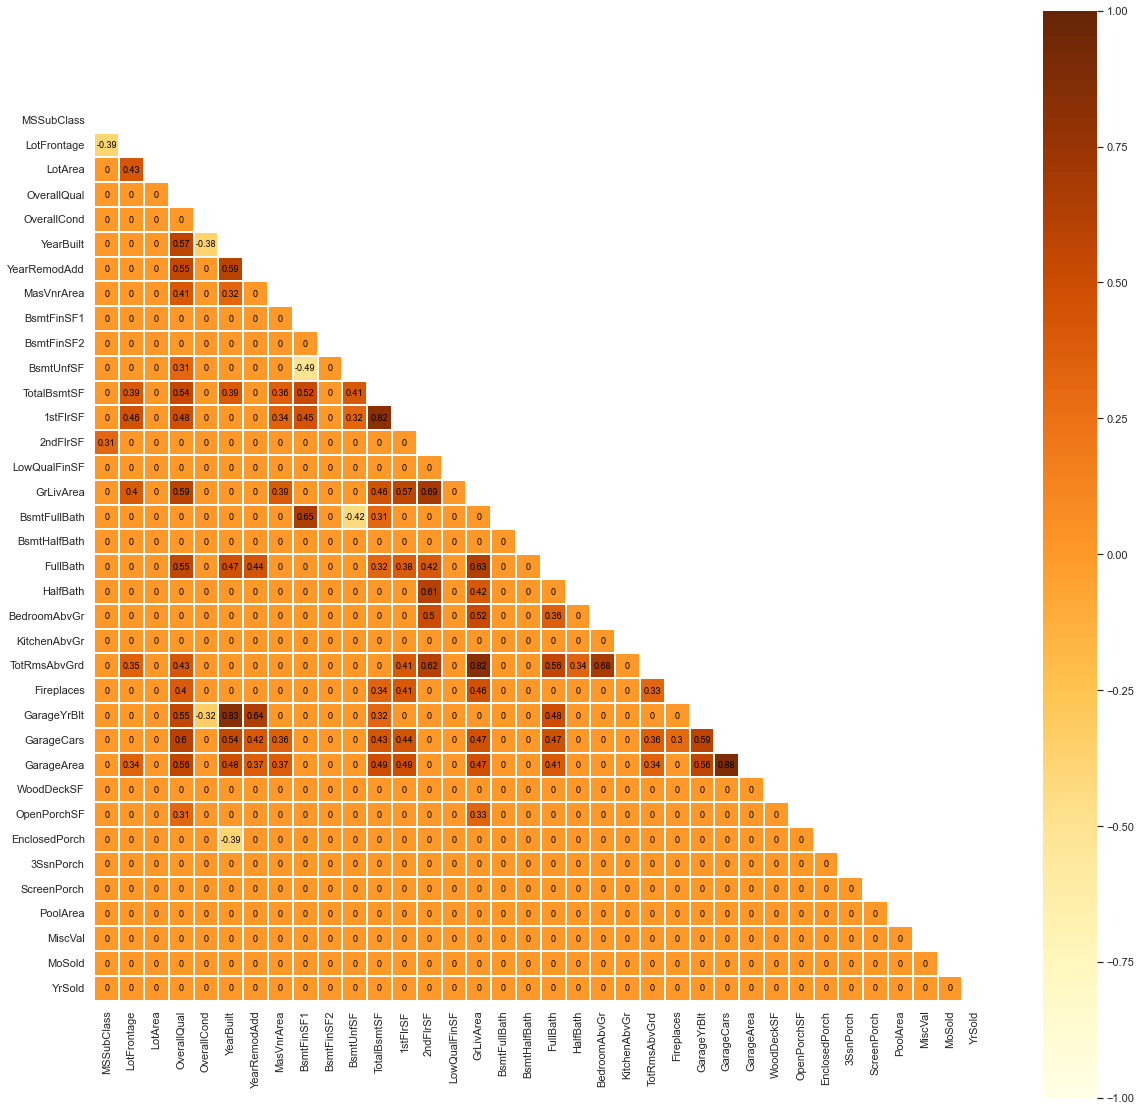

In [7]:
# Define correlation matrix
corr_feature_feature= df_train.loc[:,df_train.columns != "SalePrice"].corr().round(3)

# Replace correlation < |0.35| by 0 for a better visibility
corr_feature_feature[np.abs(corr_feature_feature) < 0.3] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_feature_feature, dtype=bool))

# Choose the color map
cmap = "YlOrBr"

# plot the heatmap
sns.set(rc={"figure.figsize": (20, 20)})
sns.set_style("whitegrid")
sns.heatmap(corr_feature_feature, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

In [8]:
#Correlation: feature to feature...
# Define correlation matrix
corr_feature_feature= df_train.loc[:,df_train.columns != "SalePrice"].corr().round(3)

# Replace correlation < |0.35| by 0 for a better visibility
corr_feature_feature[np.abs(corr_feature_feature) < 0.3] = 0


corr_feature_feature = corr_feature_feature.rename_axis(None).rename_axis(None, axis=1)
corr_feature_feature = corr_feature_feature.stack().reset_index()
corr_feature_feature.columns = ['Feature_1','Feature_2','Correlation']
corr_feature_feature =  corr_feature_feature.loc[
    (corr_feature_feature['Correlation'] !=0) & (corr_feature_feature['Feature_1'] != corr_feature_feature['Feature_2'])]

corr_out = corr_feature_feature.to_string()

print(corr_out)

corr_feature_feature.to_csv('Data/corr_out.csv',index=False)



          Feature_1      Feature_2  Correlation
1        MSSubClass    LotFrontage       -0.386
13       MSSubClass       2ndFlrSF        0.308
36      LotFrontage     MSSubClass       -0.386
38      LotFrontage        LotArea        0.426
47      LotFrontage    TotalBsmtSF        0.392
48      LotFrontage       1stFlrSF        0.457
51      LotFrontage      GrLivArea        0.403
58      LotFrontage   TotRmsAbvGrd        0.352
62      LotFrontage     GarageArea        0.345
73          LotArea    LotFrontage        0.426
113     OverallQual      YearBuilt        0.572
114     OverallQual   YearRemodAdd        0.551
115     OverallQual     MasVnrArea        0.412
118     OverallQual      BsmtUnfSF        0.308
119     OverallQual    TotalBsmtSF        0.538
120     OverallQual       1stFlrSF        0.476
123     OverallQual      GrLivArea        0.593
126     OverallQual       FullBath        0.551
130     OverallQual   TotRmsAbvGrd        0.427
131     OverallQual     Fireplaces      

#### Data Cleaning

Removed variables that had more than 10% of their values as NaN. Resulted in 11 variables being dropped from the dataset.

In [9]:
#drop features with 10% or greater NaN values...

df_keep = df_train[[column for column in df_train if df_train[column].count() / len(df_train) >= 0.95]]
print("List of dropped columns:", end=" ")
for c in df_train.columns:
    if c not in df_keep.columns:
        print(c, end=", ")
print('\n')
df_train2 = df_keep


List of dropped columns: LotFrontage, Alley, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature, 



#### Graph Target Distribution

The SalePrice variable's distribution is skewed; used the log(SalePrice) as the target variable. 

C:\Users\k_1db\AppData\Local\Temp/ipykernel_20980/2475073942.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train2["SalePriceLog"] = np.log(df_train2.SalePrice)


Text(0.5, 0, 'SalePriceLog')

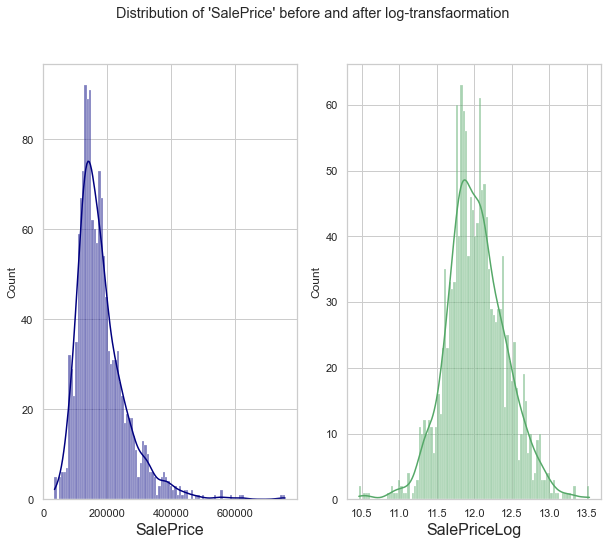

<Figure size 720x576 with 0 Axes>

In [10]:
# Graph target variable distribution...

# Log transformation of the target variable "SalePrice"
df_train2["SalePriceLog"] = np.log(df_train2.SalePrice)

# Plot the distribution before and after transformation
fig, ax = plt.subplots(1, 2,figsize=(10, 8))
fig.suptitle("Distribution of 'SalePrice' before and after log-transfaormation")
plt.figure(figsize=(10, 8))
#before log transformation
p = sns.histplot(ax=ax[0], x=df_train2["SalePrice"],
                 kde=True, bins=100, color="navy")

p.set_xlabel("SalePrice", fontsize=16)
#p.set_ylabel("Effectif", fontsize=16)


# after log transformation

q = sns.histplot(ax=ax[1], x=df_train2["SalePriceLog"],
                 kde=True, bins=100, color="g")
q.set_xlabel("SalePriceLog", fontsize=16)
#q.set_ylabel("", fontsize=16)

#### Graphs of Continuous Variables

Two sets of graphs providing insight into the continuous variables. First set of graphs shows the distribution of continuous variables in the dataset. Second set of graphs plots the relationship between the target variable and
the continuous variable via scatterplots.

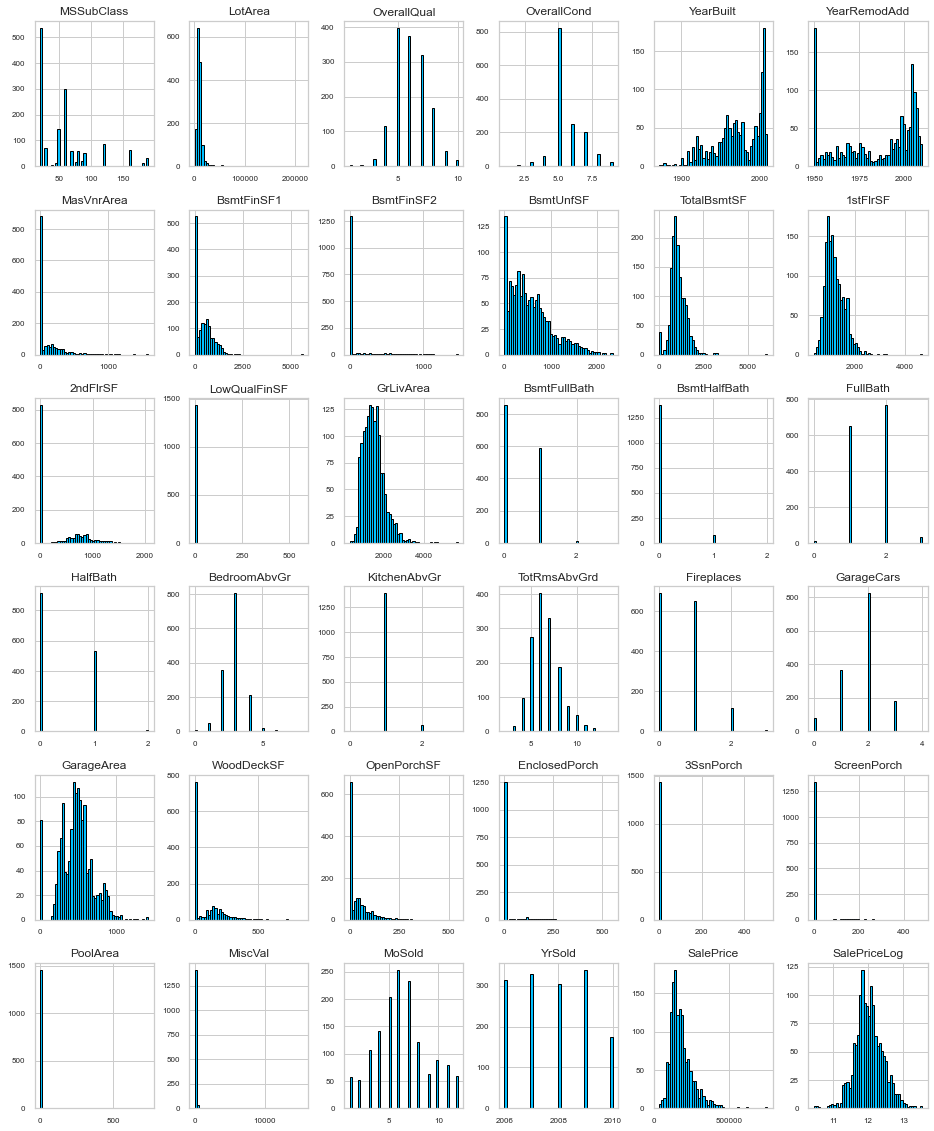

In [11]:
# Plot distribution of continuous variables
df_continuous = df_train2.select_dtypes(include = {'float64','int64'})

ax=df_continuous.hist(figsize=(16, 20), bins=50, color="deepskyblue",
                         edgecolor="black", xlabelsize=8, ylabelsize=8)

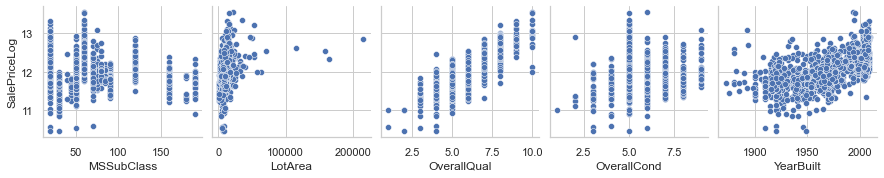

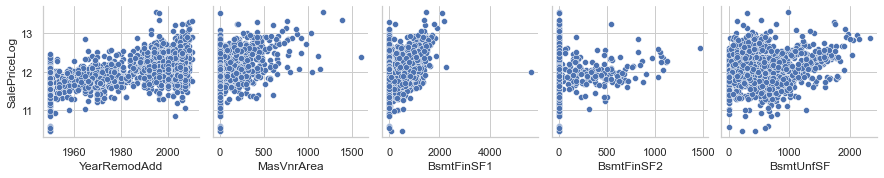

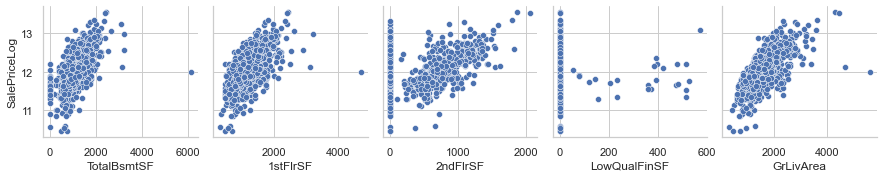

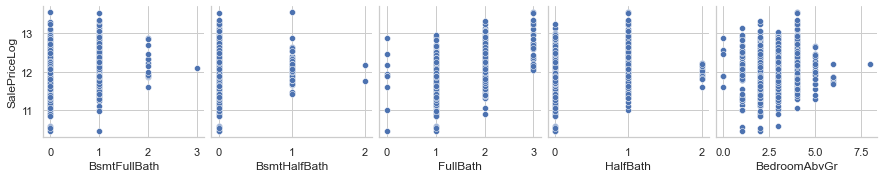

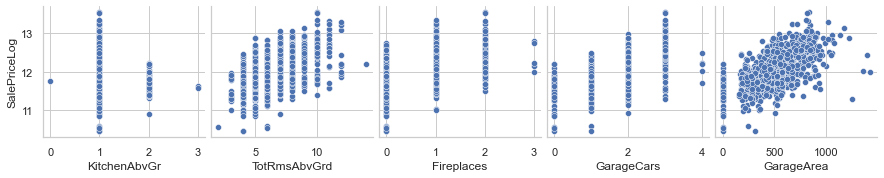

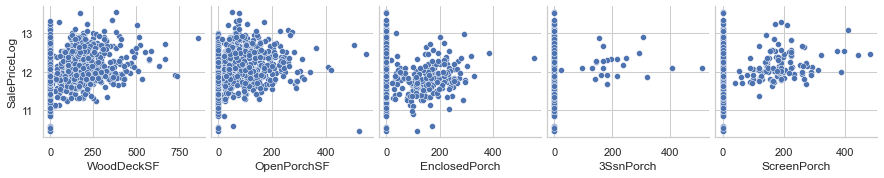

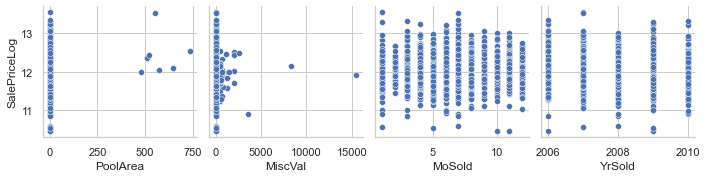

In [12]:
#pairwise scatterplots...
# Plot distribution of continuous variables
df_continuous = df_train2.select_dtypes(include = {'float64','int64'})

for i in range(0, len(df_continuous.columns)-1, 5):
    sns.pairplot(data=df_continuous,
                x_vars=df_continuous.loc[:, ~df_continuous.columns.isin(["SalePrice","SalePriceLog"])].columns[i:i+5],
                y_vars=['SalePriceLog'])
    


The above scatterplot illustrates which features have strong relationship with SalePrice. The features with strongest relationships with SalePrice are the same ones from the correlation matrix above mainly:<br>
+ OverallQual    
+ GrLivArea        
+ GarageCars       
+ GarageArea       
+ TotalBsmtSF      
+ 1stFlrSF          

#### Graphs of Categorical Variables

Two sets of graphs providing insight into the categorical variables. First set of graphs shows the distribution of categorical variables in the dataset. Second set of graphs plots the relationship between the target variable and
the categorical variable via boxplots.

In [56]:
my_order = df_categorical.groupby(by=[df_categorical.columns[0]])[df_categorical.columns[0]].count().sort_values(ascending=False)
my_order

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

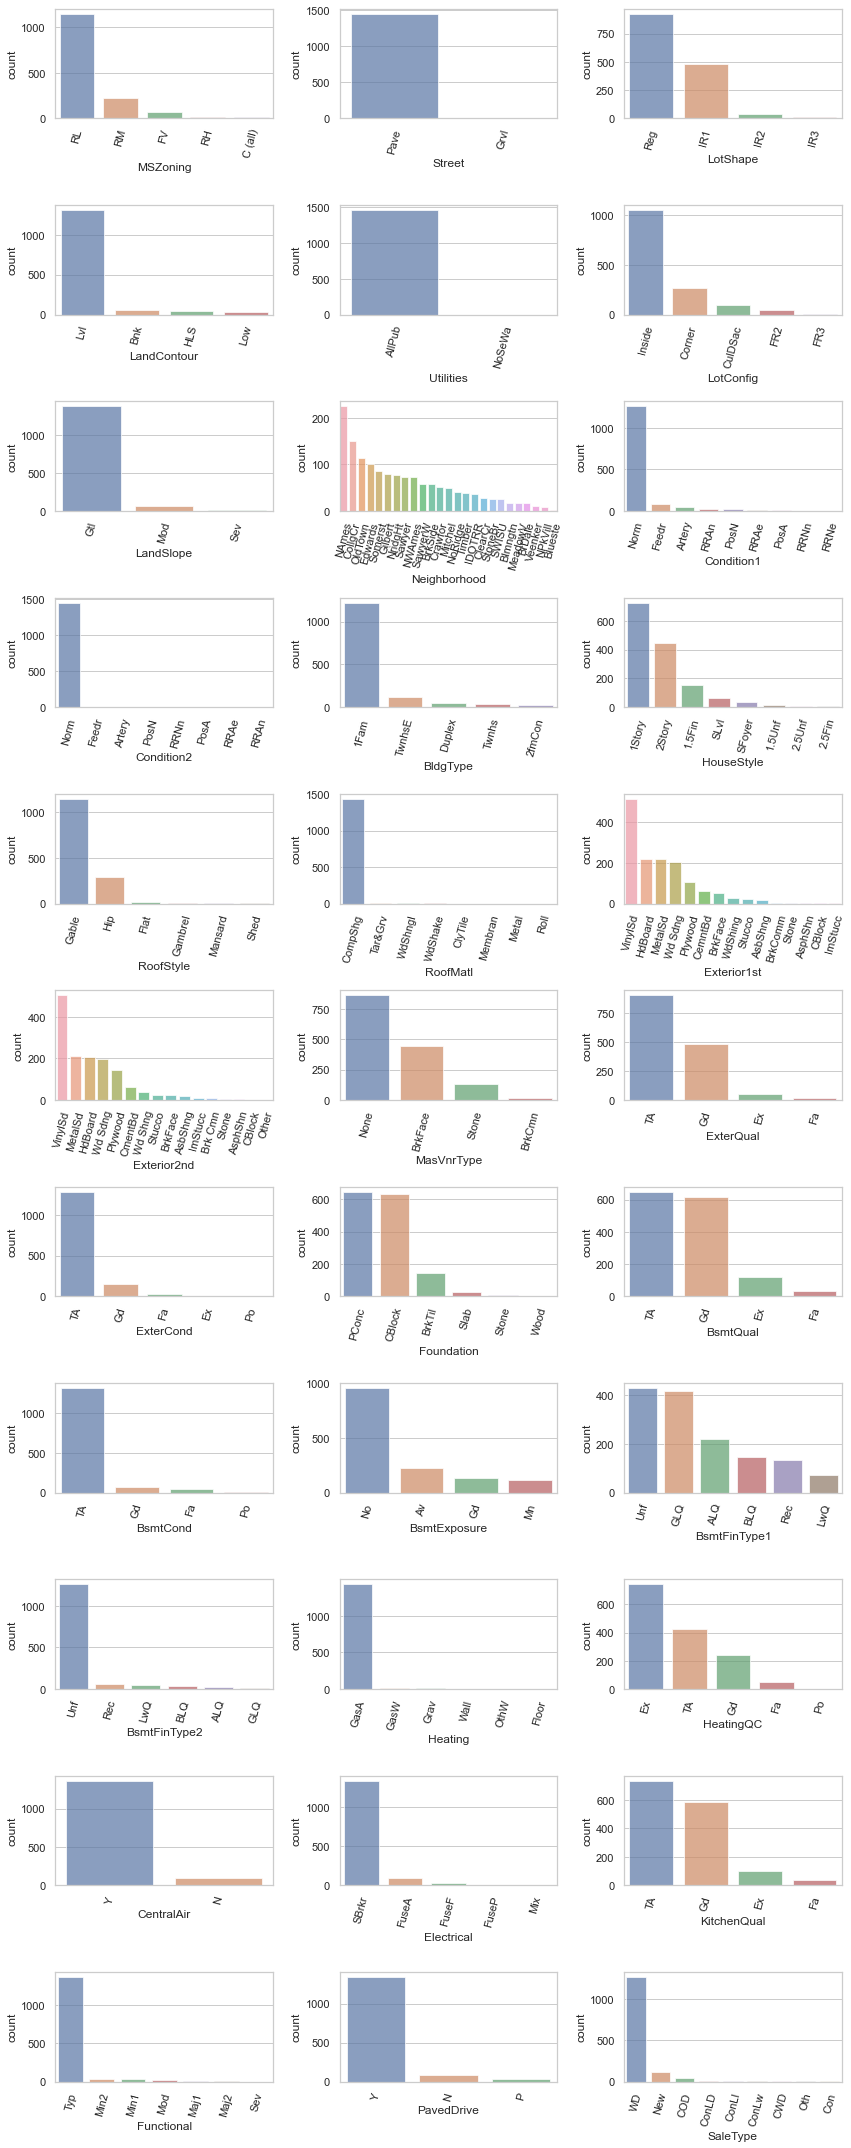

In [61]:
# Distribution of categorical variables...
df_categorical = df_train2.select_dtypes(include = {'object'})

fig, axes = plt.subplots(round(len(df_categorical.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_categorical.columns):
        
        my_order = df_categorical.groupby(
            by=[df_categorical.columns[i]])[df_categorical.columns[i]].count().sort_values(ascending=False).index
         
        sns.countplot(x=df_categorical.columns[i], alpha=0.7, data=df_categorical,ax=ax,
        order=my_order) 
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)   
fig.tight_layout()



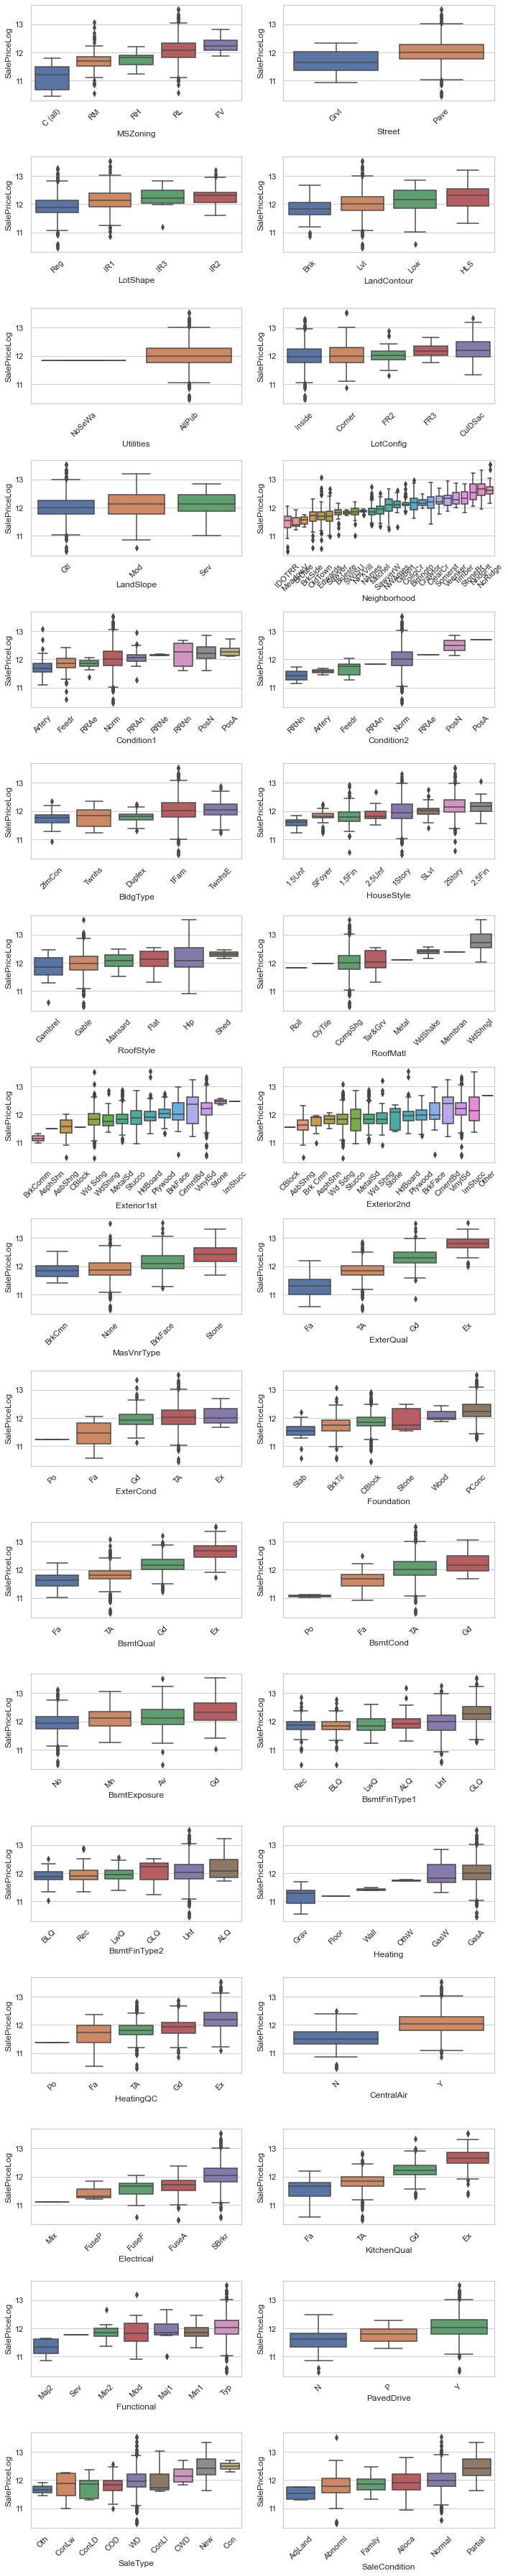

In [46]:
# Boxplots of categorical variables by target...

df_box=pd.concat([df_categorical,df_train2.loc[:,'SalePriceLog']],axis=1)

fig, axes = plt.subplots(
    round(len(df_box.columns)/2)-1, 2, figsize=(10, 50))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_box.columns) - 1:
        
        my_order = df_box.groupby(by=[df_box.columns[i]])["SalePriceLog"].mean().sort_values().index
        
        sns.boxplot(
            x=df_box.columns[i], y="SalePriceLog", data=df_box, ax=ax,
        order=my_order )
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        
fig.tight_layout()

### Pre-Processing

Missing value replacement of NaNs:<br>
*    Categorical variables missing values were replaced with the mode.<br>
*    Continuous variables missing values were replaced with the mean.<br>

SalePrice outliers were identified initially removed but results were better without removing the SalePrice outliers.<br>

Variables were selected based on correlation and the pattern of the boxplots.<br>

Selected categorical variables were transformed into dummy variables prior to modeling.<br>

The train dataset was split 70/30 into train/test datasets for model validation.

In [15]:
#missing value replacement...
print(df_train2.loc[:,df_train2.isnull().any()].info())

fill_null = {
    "MasVnrType"   : df_train2["MasVnrType"].mode().iloc[0],   
    "MasVnrArea"   : df_train2["MasVnrArea"].mean(),   
    "BsmtQual"     : df_train2["BsmtQual"].mode().iloc[0],   
    "BsmtCond"     : df_train2["BsmtCond"].mode().iloc[0],   
    "BsmtExposure" : df_train2["BsmtExposure"].mode().iloc[0],   
    "BsmtFinType1" : df_train2["BsmtFinType1"].mode().iloc[0],  
    "BsmtFinType2" : df_train2["BsmtFinType2"].mode().iloc[0],  
    "Electrical"   : df_train2["Electrical"].mode().iloc[0]
    
}

df_train_final = (df_train2.fillna(value=fill_null)).copy()
print(" "*40)
print(df_train_final.loc[:,df_train_final.isnull().any()].info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrType    1452 non-null   object 
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   Electrical    1459 non-null   object 
dtypes: float64(1), object(7)
memory usage: 134.9+ KB
None
                                        
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Empty DataFrameNone


In [16]:
#remove sale price outliers from data using interquantile rule...

Q1 = df_train_final["SalePrice"].quantile(0.25)
Q3 = df_train_final["SalePrice"].quantile(0.75)
IQR = Q3 - Q1
df_clean = df_train_final[~((df_train_final["SalePrice"]< (Q1-1.5*IQR)) | (df_train_final["SalePrice"] > (Q3+1.5*IQR)))]

In [17]:
#feature selection...

#continuous features based on correlation with sales price and feature-to-feature correlation..
continuous_feature = ["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF","1stFlrSF",
                      "FullBath", "TotRmsAbvGrd" , "YearBuilt", "YearRemodAdd" ] + ["SalePriceLog"]


#categorical features based on boxplot...

categorical_feature = ["Neighborhood",  "Condition1" ,"BldgType" ,
                       "HouseStyle", "Exterior2nd", "SaleCondition","CentralAir",
                      "KitchenQual","BsmtQual","HeatingQC","RoofStyle" ]




In [18]:
#one hot encoding
house_dum = pd.get_dummies(df_train_final.loc[:,categorical_feature], columns=categorical_feature, drop_first=True)



In [19]:
df_house = pd.concat([df_train_final.loc[:,continuous_feature],house_dum], axis=1)

SalePriceLog = df_house.SalePriceLog
df_house = df_house.drop(['SalePriceLog'],axis=1)

#### Loading libraries and modeling
The following steps where conducted in sections below: <br>
    1. Libraries for regression models loaded.<br>
    2. Dataset split into train/test.<br>
    3. Regression models defined.<br>
    4. Lists created to store model results.<br>
    
The modeling approaching was to use gridsearch to identify the best parameters for a model, then use those parameters in a model to fit the train and test data. The R^2 and RMSE are captured to compare the regression models.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
X_train, X_test, y_train, y_test = train_test_split(
    df_house, SalePriceLog, test_size=0.3, random_state=0)

#define regression models...
ridge = Ridge()
lasso = Lasso()
eNet = ElasticNet()
svr = SVR()
rf = RandomForestRegressor()
xgb = XGBRegressor()




In [21]:
# Save the model results into lists
model_list = []
r2_list = []
rmse_list = []


In [22]:
from sklearn.model_selection import GridSearchCV
# Tune hyperparameters for ridge regression

alphas = np.linspace(1e-3,20,20)
tuned_parameters = {"alpha": alphas}

# GridSearch
ridge_cv = GridSearchCV(ridge,
                        tuned_parameters,
                        cv=10, 
                        n_jobs=-1,
                        verbose=1)

# fit the GridSearch on train set
ridge_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train): {ridge_cv.best_score_}")



Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best hyperparameters: {'alpha': 6.316473684210527}
Best R² (train): 0.8672668987927687


In [23]:

#Ridge Regressor with the best hyperparameters
ridge_best = Ridge(alpha=ridge_cv.best_params_["alpha"])

# Fit the model on train set
ridge_best.fit(X_train, y_train)

# Predict on test set
y_pred_ridge = ridge_best.predict(X_test)



model_list.append(ridge_best.__class__.__name__)
r2_list.append(round(r2_score(y_test, y_pred_ridge), 4))
rmse_list.append(round(np.sqrt(mean_squared_error(y_test, y_pred_ridge)), 4))


In [24]:
# Tune hyperparameters for lasso regression

alphas = np.logspace(-5, 5, 50)

tuned_parameters = {"alpha": alphas}

# GridSearch
lasso_cv = GridSearchCV(lasso,
                        tuned_parameters,
                        cv=10, 
                        n_jobs=-1,
                        verbose=1)

# fit the GridSearch on train set
lasso_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 0.00042919342601287783}
Best R² (train): 0.8679544225394753


In [25]:
#Lasso Regressor with the best hyperparameters
lasso_best = Lasso(alpha=lasso_cv.best_params_["alpha"])

# Fit the model on train set
lasso_best.fit(X_train, y_train)

# Predict on test set
y_pred_lasso = lasso_best.predict(X_test)



model_list.append(lasso_best.__class__.__name__)
r2_list.append(round(r2_score(y_test, y_pred_lasso), 4))
rmse_list.append(round(np.sqrt(mean_squared_error(y_test, y_pred_lasso)), 4))

In [26]:
# Tune hyperparameters for elastic net regression
alphas = np.logspace(-5, 5, 50)
tuned_parameters = {  "alpha": alphas,
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

eNet_cv = GridSearchCV(eNet,
                           tuned_parameters,
                           scoring='r2',
                           cv=cv,
                           n_jobs=-1)
# fit the GridSearch on train set
eNet_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {eNet_cv.best_params_}")
print(f"Best R² (train): {eNet_cv.best_score_}")
    
  

Best hyperparameters: {'alpha': 0.002811768697974231, 'l1_ratio': 0.1}
Best R² (train): 0.859795792118008


In [27]:
#Elastic Net Regressor with the best hyperparameters
a= eNet_cv.best_params_["alpha"]
rho= eNet_cv.best_params_["l1_ratio"]

eNet= ElasticNet(alpha=a,l1_ratio=rho)

# Fit the model on train set
eNet.fit(X_train, y_train)

# Predict on test set
y_pred_eNet = eNet.predict(X_test)


model_list.append(eNet.__class__.__name__)
r2_list.append(round(r2_score(y_test, y_pred_eNet), 4))
rmse_list.append(round(np.sqrt(mean_squared_error(y_test, y_pred_eNet)), 4))

In [28]:
# Tune hyperparameters for random forest regression

tuned_parameters = { 'max_depth': range(3,20,2), 
                     'n_estimators': range(30,110,30)}



rf_cv = GridSearchCV(rf,
                     tuned_parameters,
                     cv=cv,
                     n_jobs=4,
                      return_train_score=True)

rf.set_params(random_state=0)

# fit the GridSearch on train set
rf_cv.fit(X_train, y_train)

# print cv results
rf_cv.cv_results_    


{'mean_fit_time': array([0.06209555, 0.11878702, 0.18024217, 0.08498031, 0.18133078,
        0.24689266, 0.11029545, 0.21955117, 0.38672527, 0.20394281,
        0.30572982, 0.44558578, 0.16188866, 0.37797642, 0.50940032,
        0.18310479, 0.34593207, 0.57214411, 0.19260573, 0.36488082,
        0.52842129, 0.18251818, 0.34490484, 0.5109636 , 0.18456197,
        0.34697652, 0.49893802]),
 'std_fit_time': array([0.00111034, 0.0084137 , 0.0071158 , 0.00788794, 0.01912299,
        0.00679449, 0.00825968, 0.00731134, 0.09418156, 0.02902319,
        0.02913197, 0.03373246, 0.01893918, 0.04232895, 0.04677082,
        0.02499314, 0.02098521, 0.0328408 , 0.00913501, 0.01297986,
        0.01819131, 0.02370561, 0.03012973, 0.01025714, 0.0149037 ,
        0.02905421, 0.01221279]),
 'mean_score_time': array([0.00313012, 0.00658758, 0.00654691, 0.0046052 , 0.0045289 ,
        0.01000948, 0.00406381, 0.00725241, 0.0065176 , 0.00568879,
        0.00994209, 0.01275091, 0.00598529, 0.00895761, 0.013292

#### Random Forest

To determine the best parameters plotting the learning curve was used. 

Text(0, 0.5, 'Accuracy')

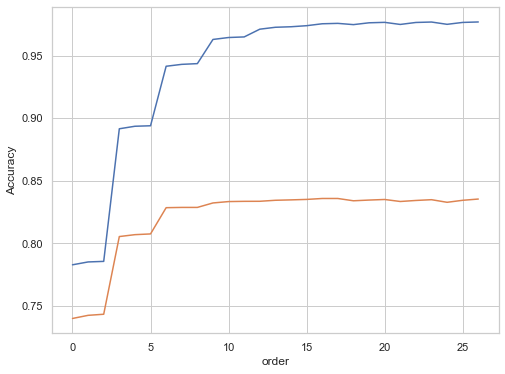

In [29]:
#plot learning curve to pick model...

fig = plt.figure(figsize=(8, 6))
ans=pd.DataFrame(rf_cv.cv_results_)
ans['mean_train_score'].plot()
ans['mean_test_score'].plot()
plt.xlabel('order')
plt.ylabel('Accuracy')


In [30]:
print(ans['params'][3])

{'max_depth': 5, 'n_estimators': 30}


In [31]:
#Random forest Regressor with the best hyperparameters

rf.set_params(max_depth=5, n_estimators=30, random_state=0)

# Fit the model on train set
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

model_importance = pd.Series(rf.feature_importances_, index=X_test.columns).sort_values(ascending=False).nlargest(20)

model_importance

model_list.append(rf.__class__.__name__)
r2_list.append(round(r2_score(y_test, y_pred_rf), 4))
rmse_list.append(round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 4))

List of top 20 important features

In [32]:
#top 20 features of importance...
importances = {}
importances['features'] = model_importance
importances['features']

OverallQual             0.608009
GrLivArea               0.144916
TotalBsmtSF             0.052657
GarageArea              0.042301
CentralAir_Y            0.038501
1stFlrSF                0.029203
GarageCars              0.024384
YearBuilt               0.024148
YearRemodAdd            0.005384
BsmtQual_Gd             0.005119
Neighborhood_IDOTRR     0.003035
Exterior2nd_Brk Cmn     0.002935
TotRmsAbvGrd            0.002437
KitchenQual_Gd          0.001691
SaleCondition_Normal    0.001304
BsmtQual_TA             0.001248
FullBath                0.001164
Neighborhood_Crawfor    0.000944
Condition1_PosN         0.000922
Exterior2nd_VinylSd     0.000882
dtype: float64

In [33]:
# Tune hyperparameters for xgboost regression


tuned_parameters = {"max_depth": [3],
                    "colsample_bytree": [0.3, 0.7],
                    "learning_rate": [0.01, 0.05, 0.1],
                    "n_estimators": [100, 500]}

xgb_cv = GridSearchCV(xgb,
                      param_grid =tuned_parameters,
                      cv=5,
                      n_jobs=-1)

# fit the GridSearch on train set
xgb_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {xgb_cv.best_params_}")
print(f"Best R² (train): {xgb_cv.best_score_}")
    

Best hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
Best R² (train): 0.866850396534292


In [34]:
#xgb Regressor with the best hyperparameters

xgb_best = XGBRegressor(colsample_bytree = xgb_cv.best_params_["colsample_bytree"],
                        learning_rate = xgb_cv.best_params_["learning_rate"],
                        max_depth = xgb_cv.best_params_["max_depth"],
                        n_estimators = xgb_cv.best_params_["n_estimators"])

# Fit the model on train set
xgb_best.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_best.predict(X_test)


model_list.append(xgb_best.__class__.__name__)
r2_list.append(round(r2_score(y_test, y_pred_xgb), 4))
rmse_list.append(round(np.sqrt(mean_squared_error(y_test, y_pred_xgb)), 4))

In [35]:
# Tune hyperparameters for svr...

svr.set_params(kernel='rbf')

tuned_parameters = {'C':np.linspace(1,100,10), 
                    'gamma':np.linspace(1e-06, 1e-01, 20)}

svr_cv = GridSearchCV(svr,
                      tuned_parameters,
                      cv=5,
                      return_train_score=True,
                      n_jobs=-1)

# fit the GridSearch on train set
svr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {svr_cv.best_params_}")
print(f"Best R² (train): {svr_cv.best_score_}")
    

    

Best hyperparameters: {'C': 12.0, 'gamma': 1e-06}
Best R² (train): 0.797478921132523


In [36]:
#svr with the best hyperparameters

svr_best = svr.set_params(kernel= 'rbf',
                          C = svr_cv.best_params_["C"],
                          gamma =svr_cv.best_params_["gamma"] )

# Fit the model on train set
svr_best.fit(X_train, y_train)

# Predict on test set
y_pred_svr = svr_best.predict(X_test)


model_list.append(svr_best.__class__.__name__)
r2_list.append(round(r2_score(y_test, y_pred_svr), 4))
rmse_list.append(round(np.sqrt(mean_squared_error(y_test, y_pred_svr)), 4))

In [37]:
# Create a table with pd.DataFrame
model_results = pd.DataFrame({"Model": model_list,
                              "R²": r2_list,
                              "RMSE": rmse_list})

model_results

,Model,R²,RMSE
0,Ridge,0.8132,0.1699
1,Lasso,0.8115,0.1707
2,ElasticNet,0.8124,0.1702
3,RandomForestRegressor,0.8458,0.1544
4,XGBRegressor,0.8838,0.1340
5,SVR,0.8314,0.1614


The best performing model was the XGBoost regression model and the worst performing models were the penalized regression models. There was not much difference between the Ridge,Lasso and ElasticNet regression models. The analysis suffers from a lack of feature expoloration due time constraints. The source code can be found on [GitHub](https://github.com/kelenosi/ML_Project.git).